In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
from rdkit import Chem


In [78]:
from rdkit import Chem
from rdkit.Chem.Descriptors import (
    ExactMolWt,
    HeavyAtomMolWt,
    MolWt,
    MaxPartialCharge,
    MinPartialCharge,
    NumRadicalElectrons,
    NumValenceElectrons,
)
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.QED import default, weights_max, weights_none
from rdkit.Chem.Lipinski import (
    NHOHCount,
    NOCount,
    NumHAcceptors,
    NumHDonors,
    NumHeteroatoms,
    NumRotatableBonds,
    RingCount,
)

In [79]:
df = pd.read_csv("basic_data.csv")
df.head()
df.columns

Index(['cid', 'smiles', 'action', 'action_gen'], dtype='object')

In [80]:
df

,cid,smiles,action,action_gen
0,2159,CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC,AGONIST,AGONIST
1,2160,CN(C)CCC=C1C2=CC=CC=C2CCC3=CC=CC=C31,BINDER,OTHER
2,2562,CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2,ANTAGONIST,ANTAGONIST
3,3345,CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3,AGONIST,AGONIST
4,3821,CNC1(CCCCC1=O)C2=CC=CC=C2Cl,BINDER,OTHER
...,...,...,...,...
166,132990963,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=C(C=C4)F,AGONIST,AGONIST
167,132990975,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=CC=C4F,AGONIST,AGONIST
168,134156377,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C...,AGONIST,AGONIST
169,137434175,CCC1=CC2=C(C(=C(N=C2C(=C1)F)N3CCC(CC3)NC4CCOCC...,ANTAGONIST,ANTAGONIST


In [81]:
df['mol'] = df['smiles'].apply(lambda x : Chem.MolFromSmiles(x))
df

,cid,smiles,action,action_gen,mol
0,2159,CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
1,2160,CN(C)CCC=C1C2=CC=CC=C2CCC3=CC=CC=C31,BINDER,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
2,2562,CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2,ANTAGONIST,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
3,3345,CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
4,3821,CNC1(CCCCC1=O)C2=CC=CC=C2Cl,BINDER,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
...,...,...,...,...,...
166,132990963,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=C(C=C4)F,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
167,132990975,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=CC=C4F,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
168,134156377,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C...,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...
169,137434175,CCC1=CC2=C(C(=C(N=C2C(=C1)F)N3CCC(CC3)NC4CCOCC...,ANTAGONIST,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...


In [82]:
df['MolWt'] = df['mol'].apply(lambda m :MolWt(m))
df['ExactMolWt'] = df['mol'].apply(lambda m :ExactMolWt(m))
df['HeavyAtomMolWt'] = df['mol'].apply(lambda m :HeavyAtomMolWt(m))
df['MaxPartialCharge'] = df['mol'].apply(lambda m :MaxPartialCharge(m))
df['MinPartialCharge'] = df['mol'].apply(lambda m :MinPartialCharge(m))
df['NumRadicalElectrons'] = df['mol'].apply(lambda m :NumRadicalElectrons(m))
df['NumValenceElectrons'] = df['mol'].apply(lambda m :NumValenceElectrons(m))
df['MolLogP'] = df['mol'].apply(lambda m :MolLogP(m))
df['weights_max'] = df['mol'].apply(lambda m :weights_max(m))
df['default'] = df['mol'].apply(lambda m :default(m))
df['weights_none'] = df['mol'].apply(lambda m :weights_none(m))
df['NHOHCount'] = df['mol'].apply(lambda m :NHOHCount(m))
df['NOCount'] = df['mol'].apply(lambda m :NOCount(m))
df['NumHAcceptors'] = df['mol'].apply(lambda m :NumHAcceptors(m))
df['NumHDonors'] = df['mol'].apply(lambda m :NumHDonors(m))
df['NumHeteroatoms'] = df['mol'].apply(lambda m :NumHeteroatoms(m))
df['NumRotatableBonds'] = df['mol'].apply(lambda m :NumRotatableBonds(m))
df['RingCount'] = df['mol'].apply(lambda m :RingCount(m))

In [83]:
df.drop('NumRadicalElectrons',axis=1, inplace=True)

In [84]:
df_moldesc = df.iloc[:, 3:]
df_moldesc

,action_gen,mol,MolWt,ExactMolWt,HeavyAtomMolWt,MaxPartialCharge,MinPartialCharge,NumValenceElectrons,MolLogP,weights_max,default,weights_none,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,RingCount
0,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,369.487,369.172227,342.271,0.254647,-0.495842,140,1.28510,0.691436,0.702317,0.687720,3,7,6,2,8,7,2
1,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,277.411,277.183050,254.227,0.001014,-0.309092,108,4.16860,0.836041,0.813678,0.620380,0,1,1,0,1,3,3
2,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,333.472,333.230394,302.224,0.316138,-0.462565,134,3.40000,0.428556,0.485829,0.609808,0,4,4,0,4,10,2
3,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,336.479,336.220164,308.255,0.226459,-0.309290,132,4.13670,0.786816,0.791487,0.794927,0,3,2,0,3,6,3
4,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,237.730,237.092042,221.602,0.156947,-0.304286,86,2.89780,0.854116,0.857157,0.864922,1,2,2,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,366.524,366.247127,335.276,0.122729,-0.297847,144,5.05980,0.749976,0.729695,0.670214,0,2,2,0,3,5,4
167,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,366.524,366.247127,335.276,0.127497,-0.297847,144,5.05980,0.749976,0.729695,0.670214,0,2,2,0,3,5,4
168,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,485.486,485.189711,454.238,0.335427,-0.492857,190,-1.83870,0.427268,0.373375,0.220231,8,12,8,4,12,4,5
169,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000024E724...,453.562,453.254003,421.306,0.261461,-0.381329,176,4.34054,0.656867,0.615779,0.578615,1,7,7,1,8,5,5


<AxesSubplot:>

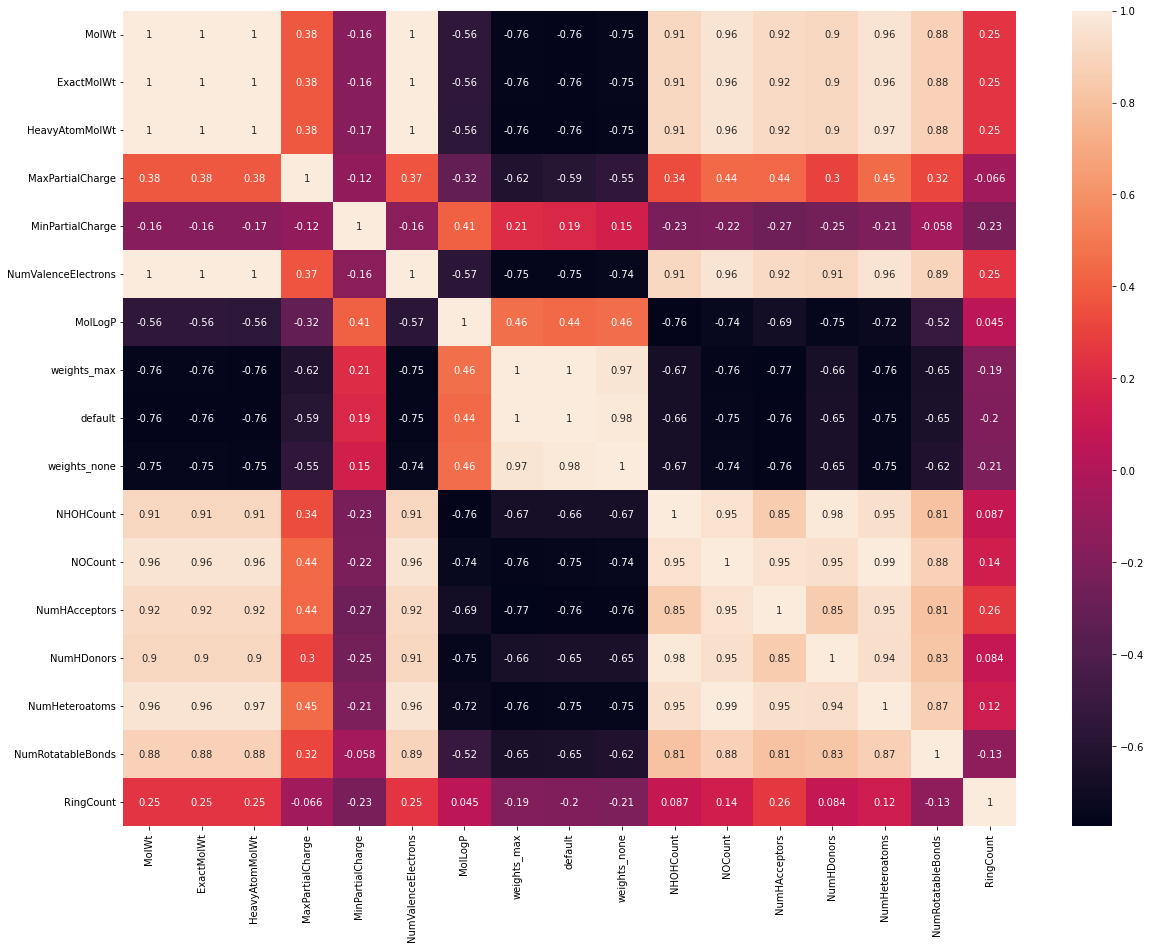

In [85]:
f, ax = plt.subplots(figsize=(20, 15))
correlation_plt = df_moldesc.iloc[:, 2:].corr()
sns.heatmap(correlation_plt, annot=True)

In [86]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import rand_score

17.099999999999994


c:\Users\ADL IPGMY\anaconda3\envs\aspire\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

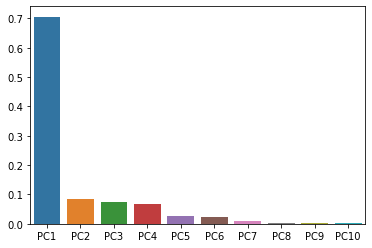

In [87]:
scaler = StandardScaler()
df_moldesc_scaled = scaler.fit_transform(df_moldesc.iloc[:, 2:])

pca = PCA().fit(df_moldesc_scaled)
pc = pca.transform(df_moldesc_scaled)

var = pca.explained_variance_[:10] / sum(pca.explained_variance_)
labels = ['PC'+ str(i) for i in range(1,11)]

print(sum(pca.explained_variance_))
sns.barplot(labels, var)

## PCA before clustering

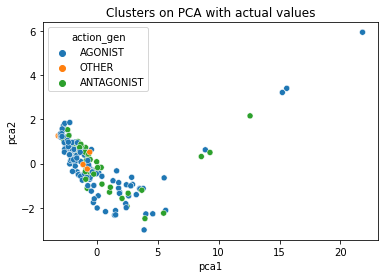

In [89]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_moldesc_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_moldesc['action_gen'], data=results)
plt.title('Clusters on PCA with actual values')
plt.show()

In [90]:
clustering_kmeans = KMeans(n_clusters=3)
results['clusters'] = clustering_kmeans.fit_predict(results)
results['clusters']

0      1
1      1
2      1
3      1
4      1
      ..
166    1
167    1
168    0
169    1
170    0
Name: clusters, Length: 171, dtype: int32

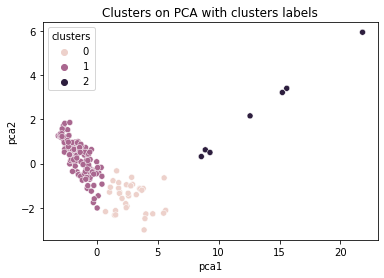

In [91]:
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results)
plt.title('Clusters on PCA with clusters labels')
plt.show()

In [96]:
# sort keys based on number of values in each clusters
print(results['clusters'].value_counts())
cluster_dict = dict(results['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

results['action_gen'] = df['action_gen']
results['action_gen_cluster'] = results['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'OTHER'})

print('rand_score: ', rand_score(results.action_gen, results.clusters))
print('Accuracy', results[results.action_gen == results.action_gen_cluster].shape[0] / results.shape[0])

1    129
0     35
2      7
Name: clusters, dtype: int64
rand_score:  0.49865841073271416


0.5672514619883041

## Cluster directly

In [94]:
clustering_kmeans = KMeans(n_clusters=3)
df_moldesc['clusters'] = clustering_kmeans.fit_predict(df_moldesc_scaled)
df_moldesc['clusters']

0      1
1      1
2      1
3      1
4      1
      ..
166    1
167    1
168    0
169    1
170    0
Name: clusters, Length: 171, dtype: int32

In [97]:
# sort keys based on number of values in each clusters
print(df_moldesc['clusters'].value_counts())
cluster_dict = dict(df_moldesc['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

df_moldesc['action_gen'] = df['action_gen']
df_moldesc['action_gen_cluster'] = df_moldesc['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'OTHER'})

print('rand_score: ', rand_score(df_moldesc.action_gen, df_moldesc.action_gen_cluster))
print('Accuracy', df_moldesc[df_moldesc.action_gen == df_moldesc.action_gen_cluster].shape[0] / df_moldesc.shape[0])

1    128
0     36
2      7
Name: clusters, dtype: int64
rand_score:  0.5018919848641211


0.5730994152046783

In [98]:
df['action_gen'].value_counts()

AGONIST       120
ANTAGONIST     43
OTHER           8
Name: action_gen, dtype: int64